# Explore Data & Clean

In [16]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read file into a df

df = pd.read_csv('data/kc_house_data.csv')

## Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning
<br>
Based on our business problem of a home builder looking to develop a parcel of land, these are the columns to: <br>
Remove: id, date, waterfront, view, r_renovated, condition,  lat, long, sqft_above, sqft_basement <br>
Probable Remove:sqft_living15, sqft_lot15 <br>
Maybe: floors, yr_built, grade <br>
Keep: price, bedrooms, bathrooms, sqft_living, sqft_lot, zipcode

In [7]:
dfinit = df.drop(['id', 'date', 'yr_renovated', 'condition', 'waterfront', 'lat', 'long', 
                 'sqft_above', 'sqft_basement', 'view'], axis=1).copy()

dfrev1 = dfinit.drop(['sqft_living15', 'sqft_lot15', 'grade'], axis=1).copy()

In [8]:
dfinit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   grade          21597 non-null  object 
 7   yr_built       21597 non-null  int64  
 8   zipcode        21597 non-null  int64  
 9   sqft_living15  21597 non-null  int64  
 10  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.8+ MB


In [9]:
dfinit.grade.value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [10]:
dfinit.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [11]:
dfinit.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.053953,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.155670,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.507173,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.318152,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.052946,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.489193,-0.059541,0.280102,-0.010722
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,1.000000,-0.347210,0.326377,0.070777
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.347210,1.000000,-0.279299,-0.147294
sqft_living15,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.326377,-0.279299,1.000000,0.183515
sqft_lot15,0.082845,0.030690,0.088303,0.184342,0.718204,-0.010722,0.070777,-0.147294,0.183515,1.000000


### Create zipcode list for merging with larger dataset

In [12]:
dfrev1.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [13]:
ziplist = dfrev1.zipcode.unique().tolist()
print(ziplist)

[98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188, 98014, 98055, 98039]


### Revised Data
<br>
Before the merger with Census information, the relevant columns are:  <br>
price - Sale price (prediction target)  <br>
bedrooms - Number of bedrooms  <br>
bathrooms - Number of bathrooms  <br>
sqft_living - Square footage of living space in the home <br>
sqft_lot - Square footage of the lot  <br>
floors - Number of floors (levels) in house  <br>
yr_built - Year when house was built <br>
zipcode - ZIP Code used by the United States Postal Service

In [14]:
dfrev1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   yr_built     21597 non-null  int64  
 7   zipcode      21597 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [15]:
dfrev1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.053953,-0.053402
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.155670,-0.154092
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.507173,-0.204786
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.318152,-0.199802
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.052946,-0.129586
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.489193,-0.059541
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,1.000000,-0.347210
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.347210,1.000000


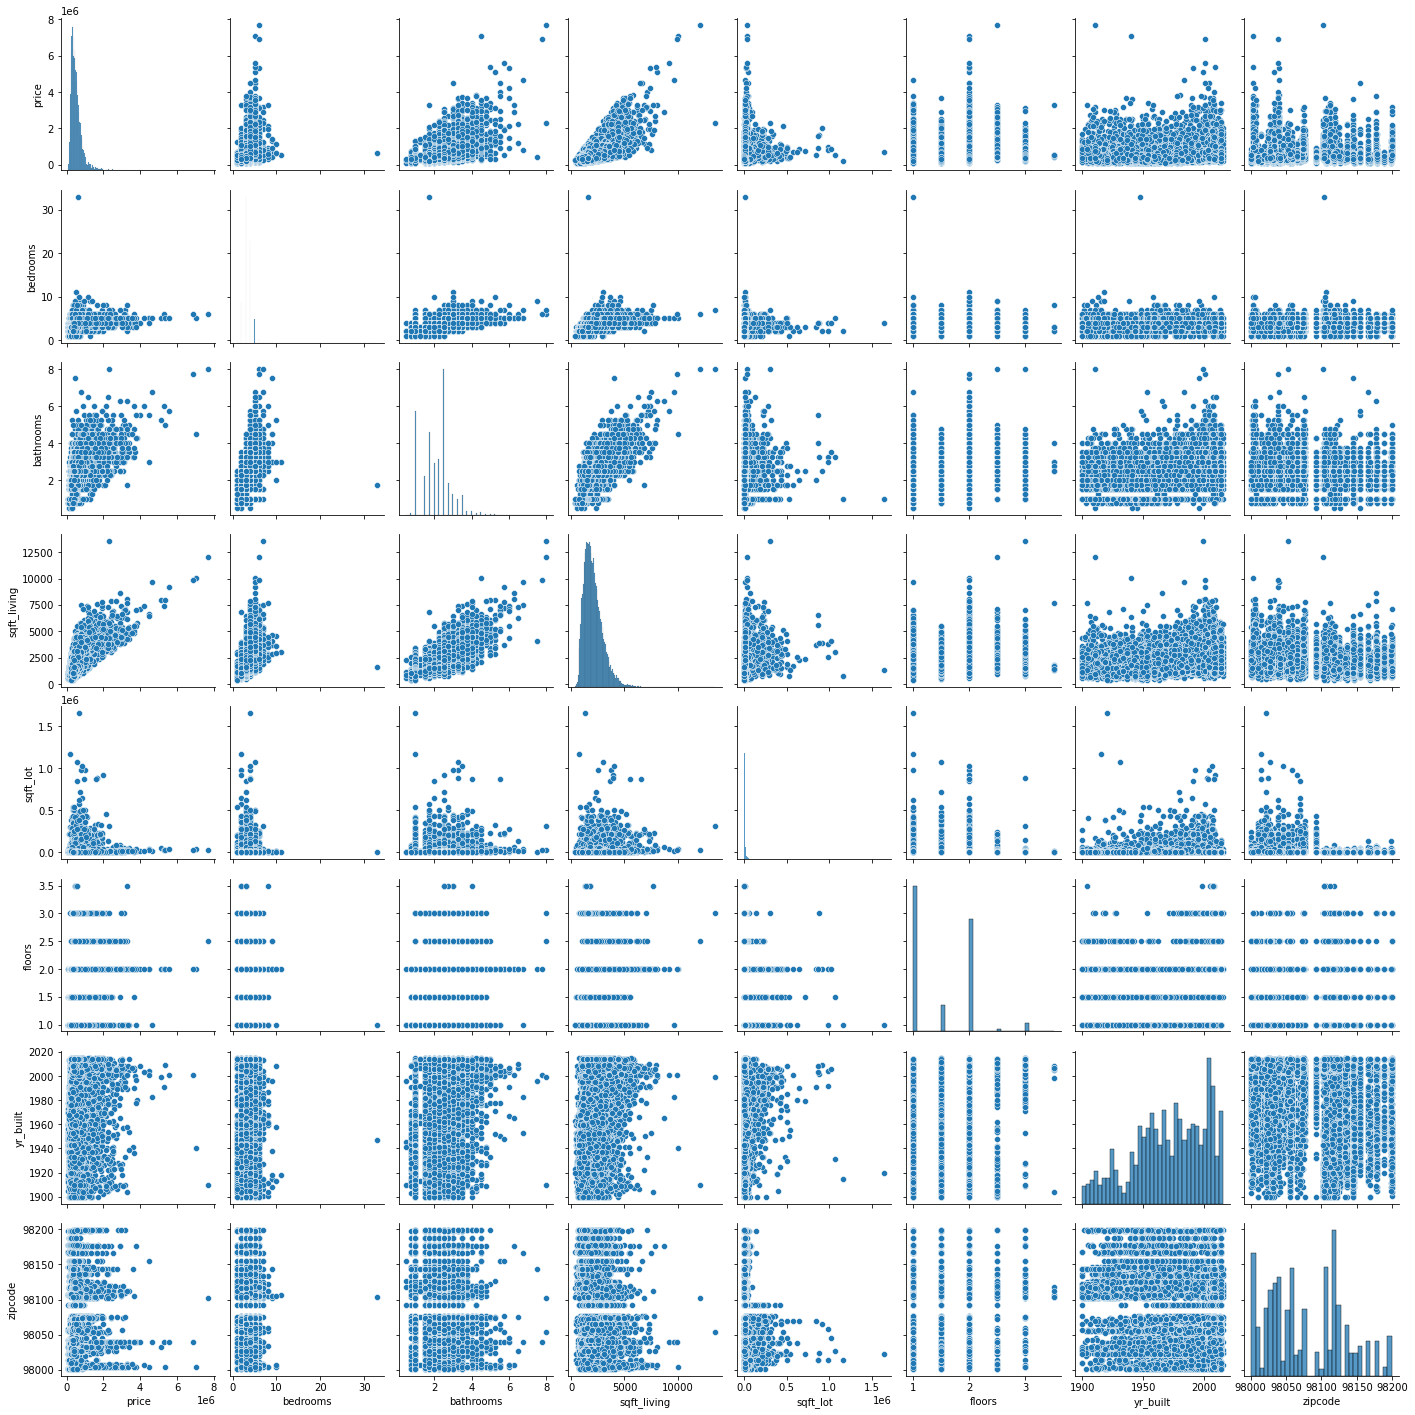

In [18]:
sns.pairplot(dfrev1)

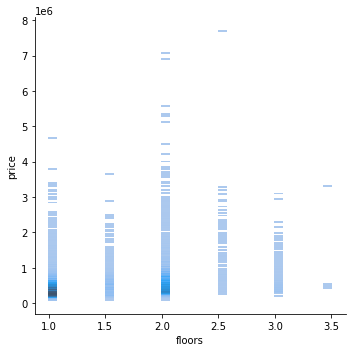

In [22]:
sns.displot(dfrev1, x="floors", y="price")